In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_uncleaned=pd.read_csv('/content/winequality-red.csv',delimiter=';')

In [ ]:
df_uncleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


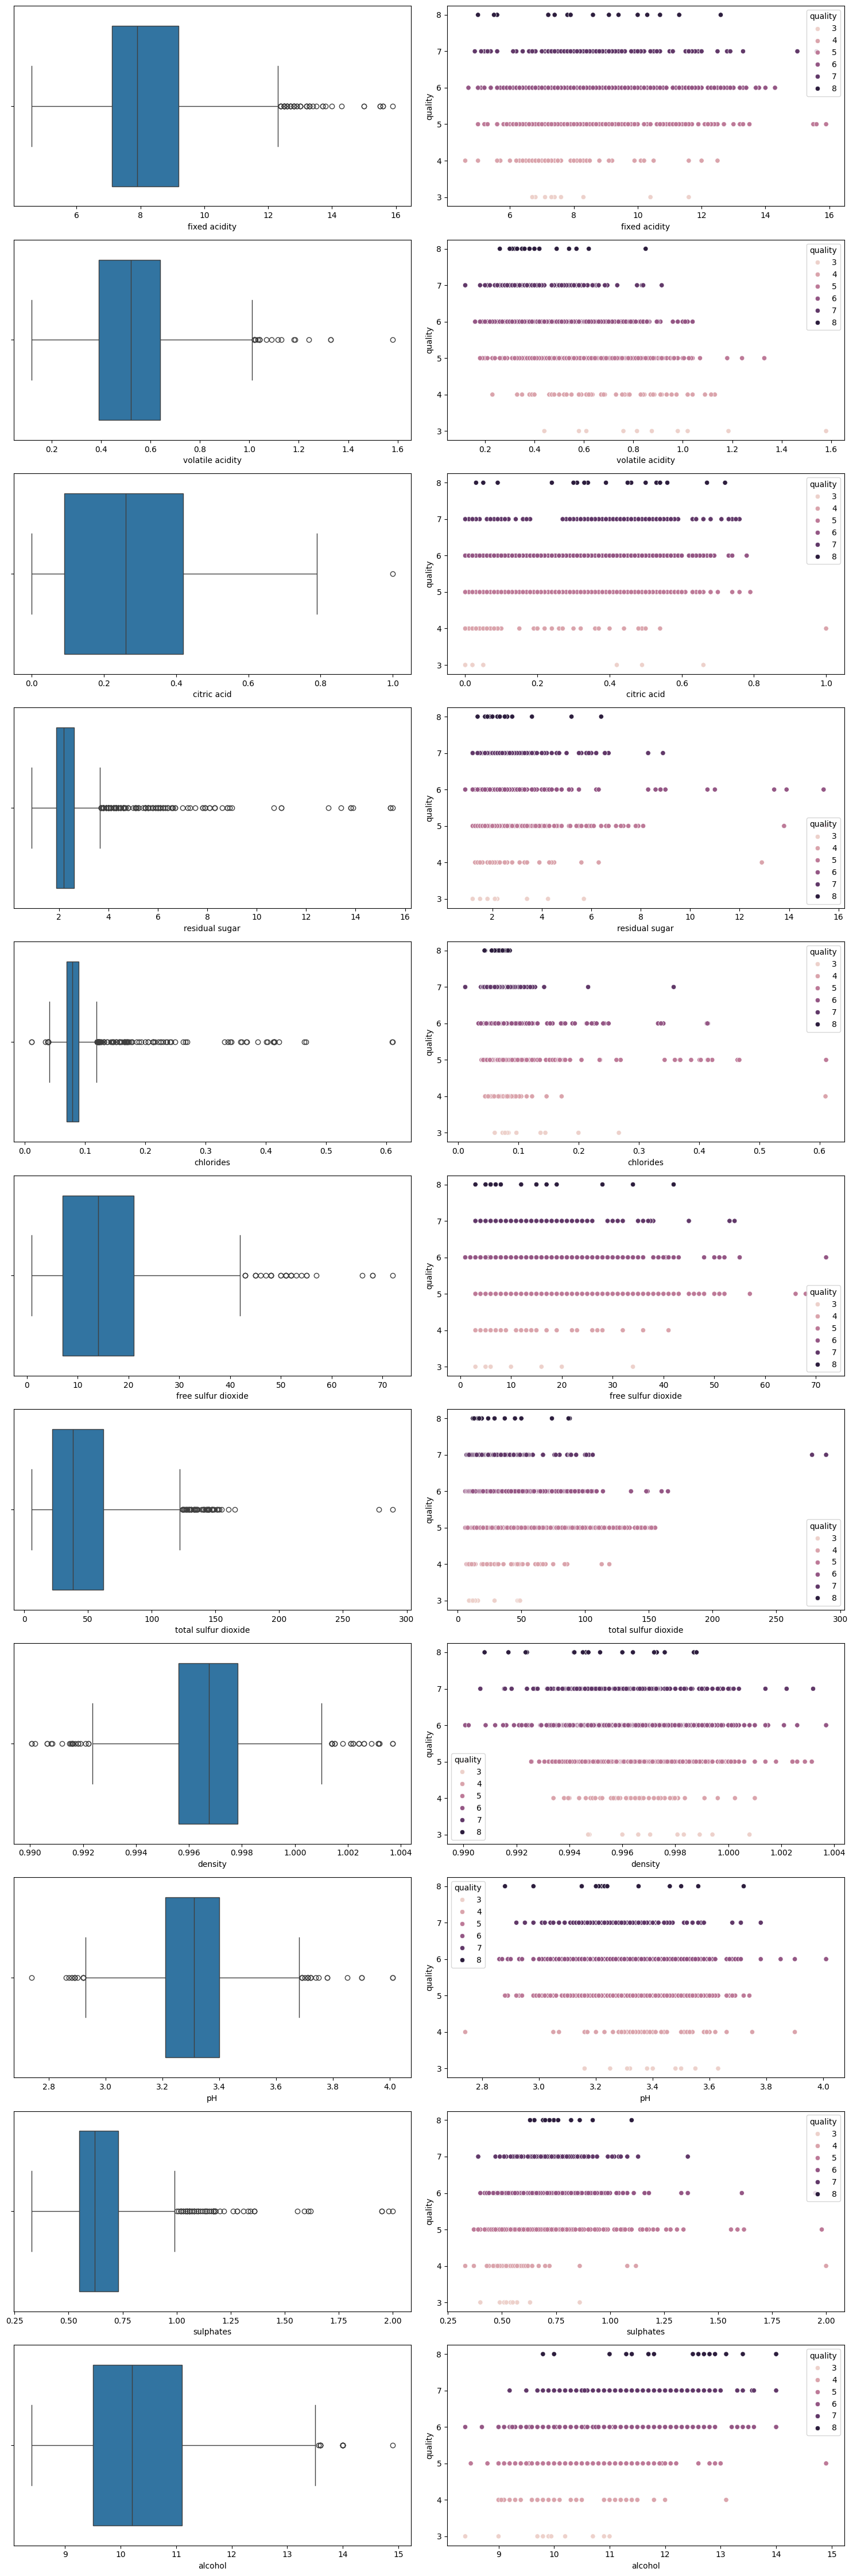

In [ ]:
fig=plt.figure(figsize=(15,45))
ax=fig.subplots(11,2)
plt.subplots_adjust(0.5)
columns=list(df_uncleaned.columns)
for i in range(11):
  sns.boxplot(x=columns[i],data=df_uncleaned,ax=ax[i,0])
  sns.scatterplot(x=columns[i],data=df_uncleaned,y='quality',hue='quality',ax=ax[i,1])
plt.tight_layout()

In [ ]:
def cap_data(df_uncleaned):
    for col in df_uncleaned.columns:
        if (((df_uncleaned[col].dtype)=='float64') | ((df_uncleaned[col].dtype)=='int64')):
            percentiles = df_uncleaned[col].quantile([0.01,0.99]).values
            df_uncleaned[col][df_uncleaned[col] <= percentiles[0]] = percentiles[0]
            df_uncleaned[col][df_uncleaned[col] >= percentiles[1]] = percentiles[1]
        else:
           df_uncleaned[col]=df_uncleaned[col]
    return df_uncleaned

df=cap_data(df_uncleaned)

<Axes: xlabel='quality', ylabel='count'>

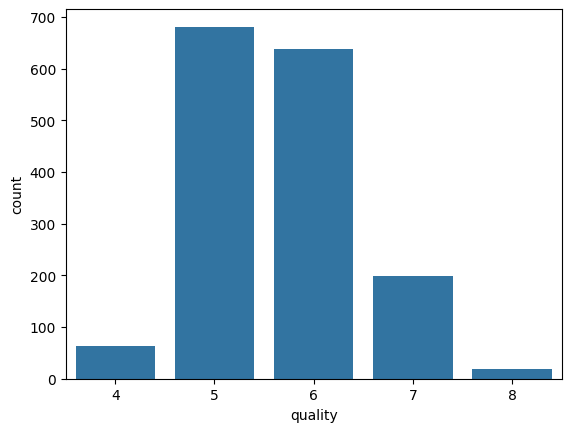

In [ ]:
sns.countplot(x=df['quality'])

In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [ ]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

In [ ]:
sc=StandardScaler()


In [ ]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)


In [ ]:
x = df.drop(['quality'], axis = 1)
y = df['quality']

In [ ]:
x=sc.fit_transform(x)

In [ ]:
x=pd.DataFrame(x, columns=df.columns[:-1])

In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.536144,0.997707,-1.399529,-0.517094,-0.262734,-0.472602,-0.385081,0.578389,1.328327,-0.623649,-0.972486
1,-0.300494,2.034105,-1.399529,0.081722,0.274080,0.902395,0.652638,0.031731,-0.736476,0.160138,-0.591283
2,-0.300494,1.343173,-1.192471,-0.174913,0.127676,-0.079746,0.243839,0.141062,-0.336837,-0.035809,-0.591283
3,1.702530,-1.420555,1.499282,-0.517094,-0.287135,0.116682,0.432516,0.687721,-1.002902,-0.493018,-0.591283
4,-0.536144,0.997707,-1.399529,-0.517094,-0.262734,-0.472602,-0.385081,0.578389,1.328327,-0.623649,-0.972486


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 4)

In [ ]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
596,2.409479,-0.729623,1.240460,-0.431549,-0.677545,-0.963672,-0.699541,1.453043,-1.802181,-0.362387,-1.067787
804,0.052981,-0.038691,-0.260710,0.167267,-0.067529,-1.160100,-0.888217,0.042664,-0.336837,-0.558333,-0.495983
449,2.114917,-0.787201,2.172220,0.252812,0.200878,0.116682,-0.353635,1.453043,-1.402541,-0.297071,0.361723
172,-0.182669,-0.614468,-0.519533,-0.431549,-0.335936,-0.963672,-0.888217,0.250394,-0.137017,-0.297071,-1.163087
655,0.818843,0.134042,-0.519533,0.338358,0.005673,0.411325,0.212393,1.999701,-1.136115,-0.297071,-0.972486


In [ ]:
classifier.fit(x_train, y_train)
preds = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       348
           1       0.74      0.44      0.55        52

    accuracy                           0.91       400
   macro avg       0.83      0.71      0.75       400
weighted avg       0.90      0.91      0.90       400



In [ ]:
from sklearn import svm
clf=svm.SVC()

In [ ]:
clf.fit(x_train,y_train)
pred_svc=clf.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       348
           1       0.67      0.31      0.42        52

    accuracy                           0.89       400
   macro avg       0.79      0.64      0.68       400
weighted avg       0.87      0.89      0.87       400



# *increasing the accuracy*

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(clf, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(x_train, y_train)
pred_grid_svc=grid_svc.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_grid_svc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       348
           1       0.79      0.44      0.57        52

    accuracy                           0.91       400
   macro avg       0.86      0.71      0.76       400
weighted avg       0.91      0.91      0.90       400

